In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pickle
from sklearn import metrics

In [2]:
df=pd.read_csv('Data/Real_Data/Real_Combine.csv')



In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


<AxesSubplot:>

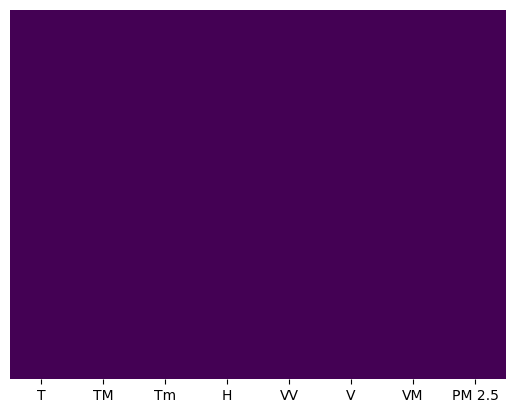

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

,T,TM,Tm,H,VV,V,VM
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1099,False,False,False,False,False,False,False
1100,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False


In [8]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1099    False
1100    False
1101    False
1102    False
1103    False
Name: PM 2.5, Length: 1103, dtype: bool

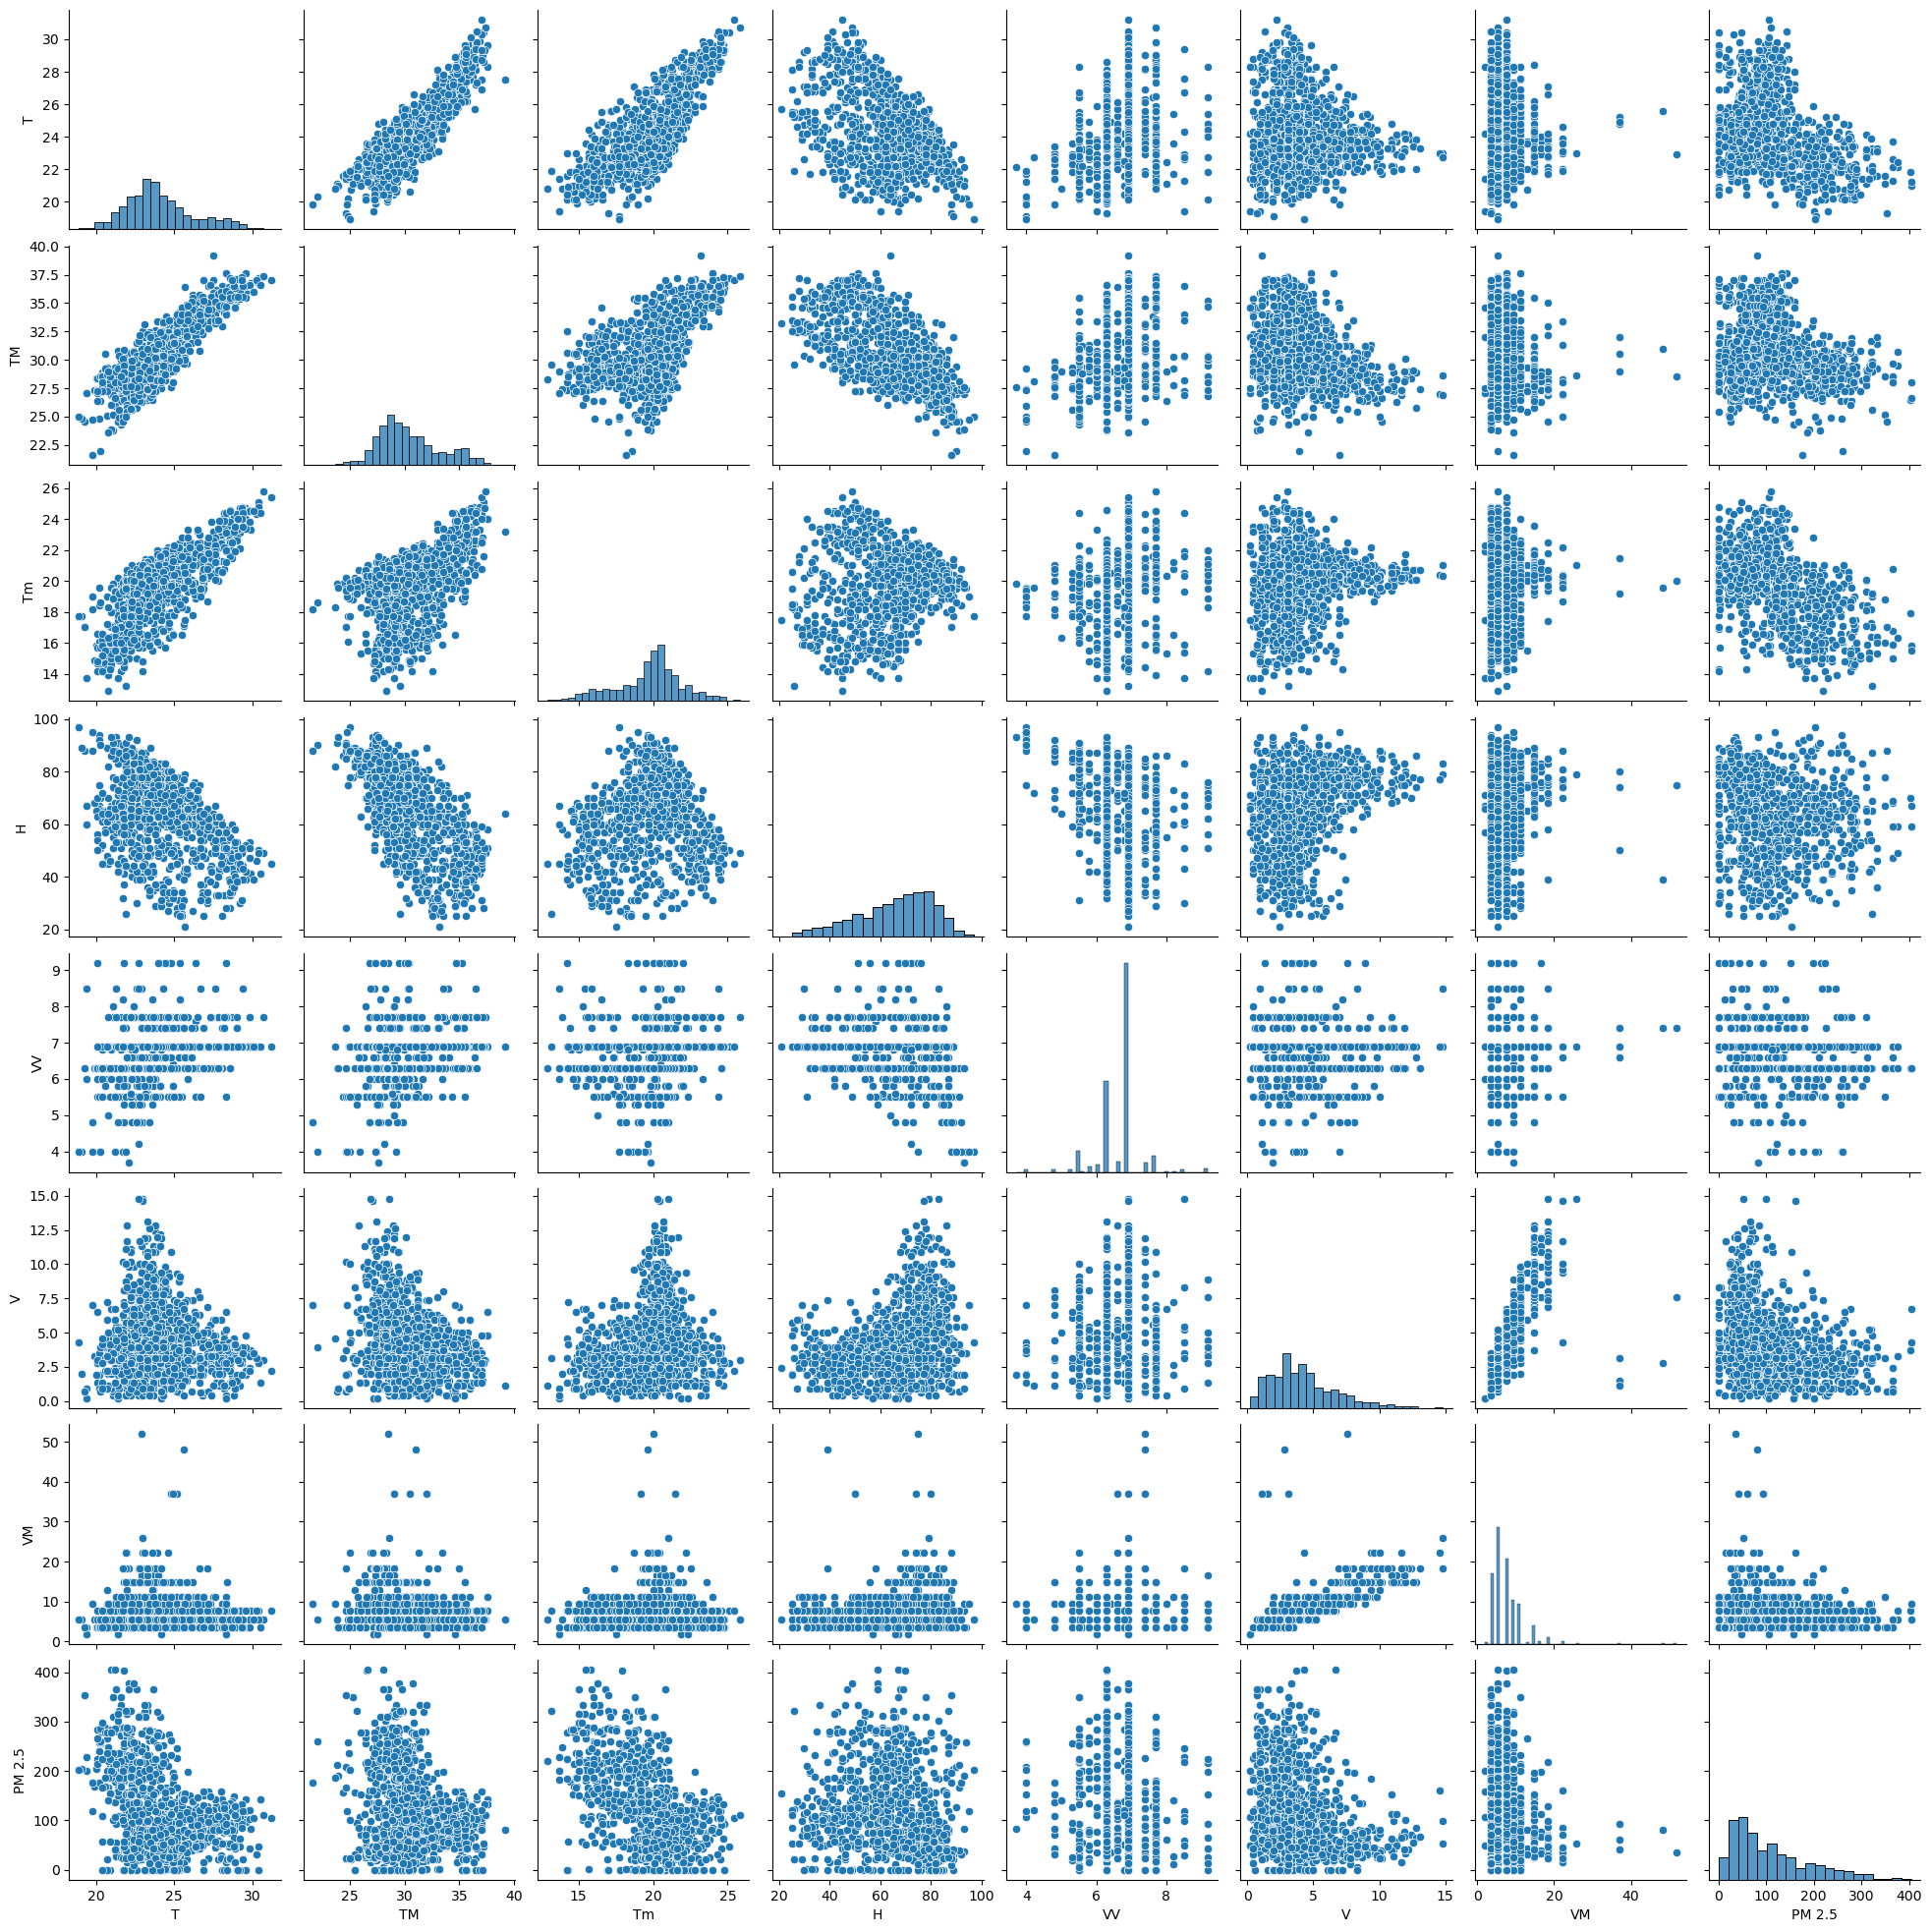

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347038
TM,0.869258,1.000000,0.478298,-0.636506,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636506,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM 2.5,-0.347038,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


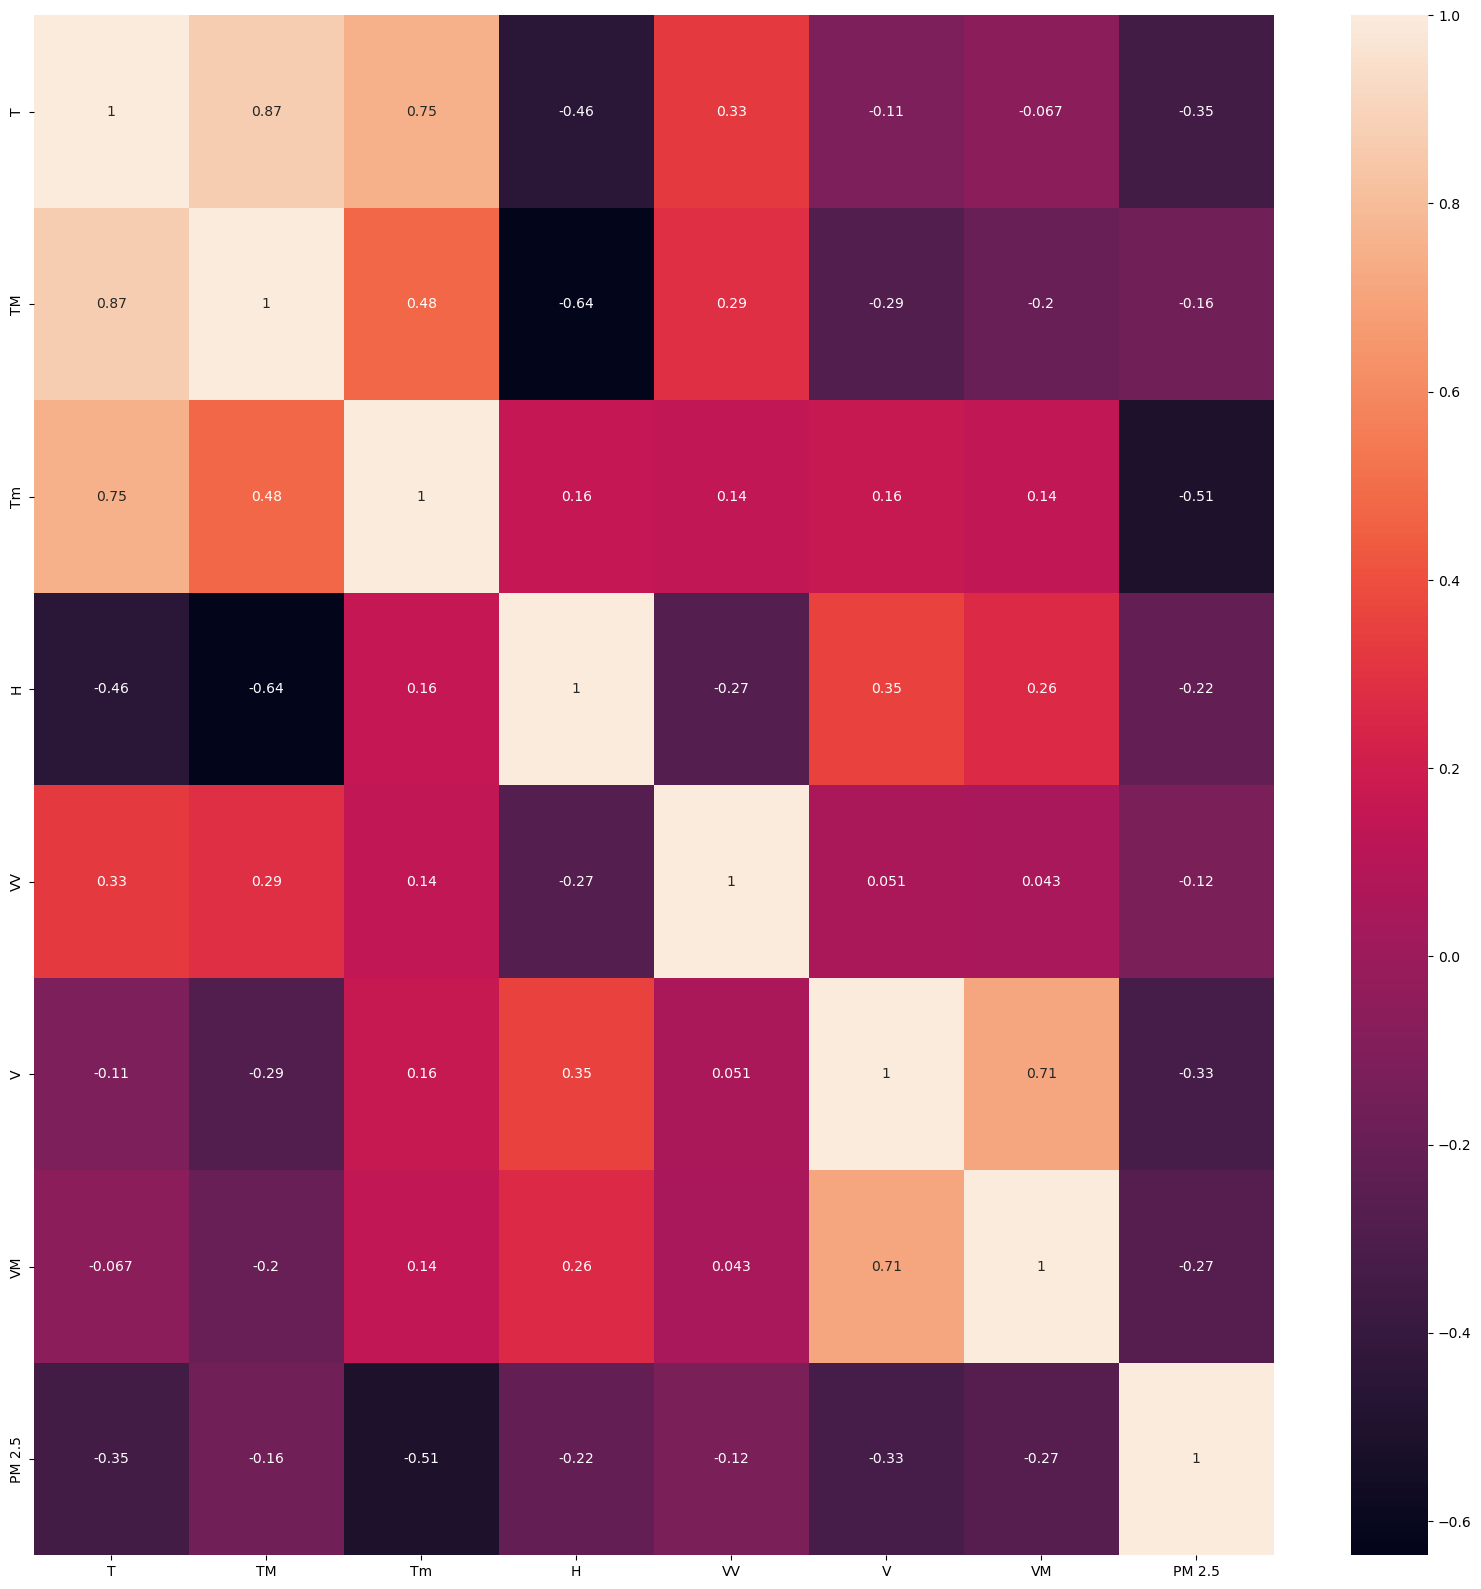

In [11]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Linear Regression

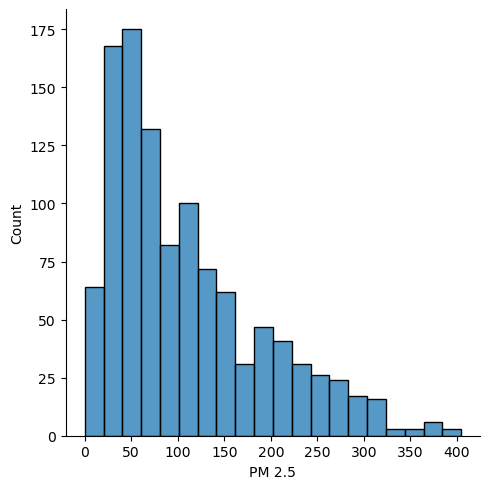

In [15]:
sns.displot(y)

### Train Test split

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
regressor.coef_

array([-22.60425621,  -0.66044288,   2.42733022,  -2.2941454 ,
        -3.9075725 ,  -7.68163577,  -1.12525806])

In [19]:
regressor.intercept_

842.8892528727154

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.3765860836817134


In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.3203644983819265


In [22]:

score=cross_val_score(regressor,X,y,cv=5)

In [23]:
score.mean()

0.3077986641408172

#### Model Evaluation

In [24]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-22.604256
TM,-0.660443
Tm,2.427330
H,-2.294145
VV,-3.907573
V,-7.681636
VM,-1.125258


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.


In [25]:
prediction=regressor.predict(X_test)

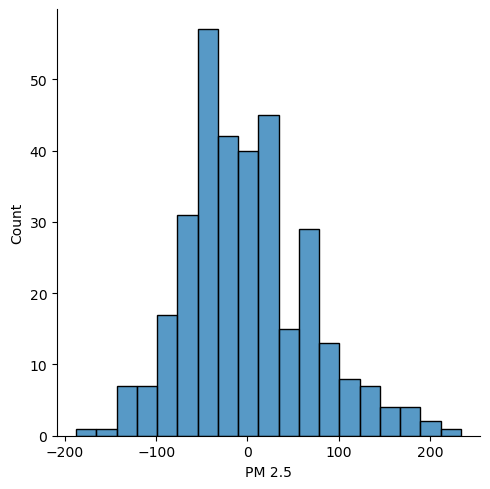

In [27]:
sns.displot(y_test-prediction)

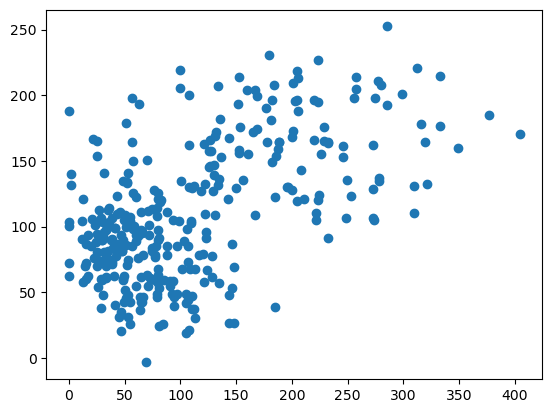

In [28]:
plt.scatter(y_test,prediction)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 53.508350139395574
MSE: 4636.584279901315
RMSE: 68.09246859896706


In [30]:
# open a file, where you ant to store the data
file = open('Linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)